In [ ]:
import pandas as pd
import geopandas
import seaborn as sns
import matplotlib.pyplot as plt
major_country = ["KOR", "CHN", "IND", "JPN", "USA", "RUS"]

Data Prossing
===

Annual GDP Part
---

In [ ]:
annual_gdp = pd.read_csv("annual_gdp.csv")
annual_gdp = annual_gdp[["Country Name", "Country Code"]
                        + [str(year) for year in range(1960, 2023)]]

In [168]:
annual_gdp = annual_gdp.melt(id_vars= ["Country Name", "Country Code"],
                             var_name= "Year", 
                             value_name= "GDP growth (annual %)")
annual_gdp["Year"] = annual_gdp["Year"].astype(int)
annual_gdp

,Country Name,Country Code,Year,GDP growth (annual %)
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN
...,...,...,...,...
16753,Kosovo,XKX,2022,5.218604
16754,"Yemen, Rep.",YEM,2022,NaN
16755,South Africa,ZAF,2022,1.910406
16756,Zambia,ZMB,2022,5.249622


In [169]:
world_gdp = annual_gdp[annual_gdp["Country Name"] == "World"]
world_gdp

,Country Name,Country Code,Year,GDP growth (annual %)
259,World,WLD,1960,NaN
525,World,WLD,1961,3.772924
791,World,WLD,1962,5.375360
1057,World,WLD,1963,5.194927
1323,World,WLD,1964,6.564476
...,...,...,...,...
15687,World,WLD,2018,3.276283
15953,World,WLD,2019,2.590785
16219,World,WLD,2020,-3.057810
16485,World,WLD,2021,6.228594


Annual Temperature Anomalies
---

In [170]:
annual_temp = pd.read_csv("annual_temperature_anomalies.csv")
annual_temp = annual_temp.rename(columns={"Entity":"Country Name",
                                          "Code": "Country Code"})
annual_temp = annual_temp[(annual_temp["Year"] >= 1960) 
                          & (annual_temp["Year"] < 2023)]
annual_temp

,Country Name,Country Code,Year,Temperature anomaly
20,Afghanistan,AFG,1960,-1.211145
21,Afghanistan,AFG,1961,-1.193919
22,Afghanistan,AFG,1962,-1.385316
23,Afghanistan,AFG,1963,-0.118881
24,Afghanistan,AFG,1964,-2.101188
...,...,...,...,...
16374,Zimbabwe,ZWE,2018,0.353328
16375,Zimbabwe,ZWE,2019,0.878123
16376,Zimbabwe,ZWE,2020,0.229296
16377,Zimbabwe,ZWE,2021,0.016834


In [171]:
world_temp = annual_temp[annual_temp["Country Name"] == "World"]
world_temp

,Country Name,Country Code,Year,Temperature anomaly
16064,World,OWID_WRL,1960,-0.612654
16065,World,OWID_WRL,1961,-0.537026
16066,World,OWID_WRL,1962,-0.597581
16067,World,OWID_WRL,1963,-0.560586
16068,World,OWID_WRL,1964,-0.772528
...,...,...,...,...
16122,World,OWID_WRL,2018,0.263880
16123,World,OWID_WRL,2019,0.399228
16124,World,OWID_WRL,2020,0.432162
16125,World,OWID_WRL,2021,0.273689


Annual Country Industry
---

In [172]:
annual_industry = pd.read_csv("annual_country_industry.csv")
annual_industry = annual_industry[["Country Name", "Country Code"]
                                  + [str(year) for year in range(1995, 2023)]]
annual_industry = annual_industry.melt(id_vars= ["Country Name", "Country Code"],
                                       var_name= "Year",
                                       value_name= "Industry Value (annual %)")
annual_industry["Year"] = annual_industry["Year"].astype(int)
annual_industry

,Country Name,Country Code,Year,Industry Value (annual %)
0,Aruba,ABW,1995,NaN
1,Africa Eastern and Southern,AFE,1995,1.702664
2,Afghanistan,AFG,1995,NaN
3,Africa Western and Central,AFW,1995,-1.380767
4,Angola,AGO,1995,NaN
...,...,...,...,...
7443,Kosovo,XKX,2022,2.093510
7444,"Yemen, Rep.",YEM,2022,NaN
7445,South Africa,ZAF,2022,-2.486408
7446,Zambia,ZMB,2022,-2.226378


In [173]:
world_industry = annual_industry[annual_industry["Country Name"] == "World"]
world_industry

,Country Name,Country Code,Year,Industry Value (annual %)
259,World,WLD,1995,3.280462
525,World,WLD,1996,3.605327
791,World,WLD,1997,3.266895
1057,World,WLD,1998,1.929036
1323,World,WLD,1999,3.374336
1589,World,WLD,2000,5.189862
1855,World,WLD,2001,0.176740
2121,World,WLD,2002,1.739339
2387,World,WLD,2003,3.822468
2653,World,WLD,2004,5.456350


Annual CO2 Emission Growth
---

In [174]:
annual_co2 = pd.read_csv("change_co2_annual_pct.csv")
annual_co2 = annual_co2.rename(columns={"Entity": "Country Name", 
                                        "Code": "Country Code",
                                        "Annual CO₂ emissions growth (%)": "CO2 emission growth"})
annual_co2 = annual_co2[(annual_co2["Year"] >= 1960) 
                        & (annual_co2["Year"] < 2023)]
annual_co2

,Country Name,Country Code,Year,CO2 emission growth
10,Afghanistan,AFG,1960,7.622516
11,Afghanistan,AFG,1961,18.583180
12,Afghanistan,AFG,1962,40.300896
13,Afghanistan,AFG,1963,2.634644
14,Afghanistan,AFG,1964,18.651236
...,...,...,...,...
25131,Zimbabwe,ZWE,2018,15.264904
25132,Zimbabwe,ZWE,2019,-8.765334
25133,Zimbabwe,ZWE,2020,-19.700300
25134,Zimbabwe,ZWE,2021,6.962347


In [175]:
world_co2 = annual_co2[annual_co2["Country Name"] == "World"]
world_co2

,Country Name,Country Code,Year,CO2 emission growth
24810,World,OWID_WRL,1960,6.005418
24811,World,OWID_WRL,1961,0.297892
24812,World,OWID_WRL,1962,3.528357
24813,World,OWID_WRL,1963,5.329990
24814,World,OWID_WRL,1964,5.431223
...,...,...,...,...
24868,World,OWID_WRL,2018,2.058244
24869,World,OWID_WRL,2019,0.742948
24870,World,OWID_WRL,2020,-5.486936
24871,World,OWID_WRL,2021,5.166876


Question 1: Tempeature change vs GDP Growth
===

World vs
---

In [176]:
merged = pd.merge(world_gdp, world_temp, on = ["Country Name", "Year"])
merged = merged[["Country Name", "Year",
                  "GDP growth (annual %)", "Temperature anomaly"]]
merged

,Country Name,Year,GDP growth (annual %),Temperature anomaly
0,World,1960,NaN,-0.612654
1,World,1961,3.772924,-0.537026
2,World,1962,5.375360,-0.597581
3,World,1963,5.194927,-0.560586
4,World,1964,6.564476,-0.772528
...,...,...,...,...
58,World,2018,3.276283,0.263880
59,World,2019,2.590785,0.399228
60,World,2020,-3.057810,0.432162
61,World,2021,6.228594,0.273689


In [177]:
avrg_gdp = merged["GDP growth (annual %)"].mean()
avrg_temp = merged["Temperature anomaly"].mean()

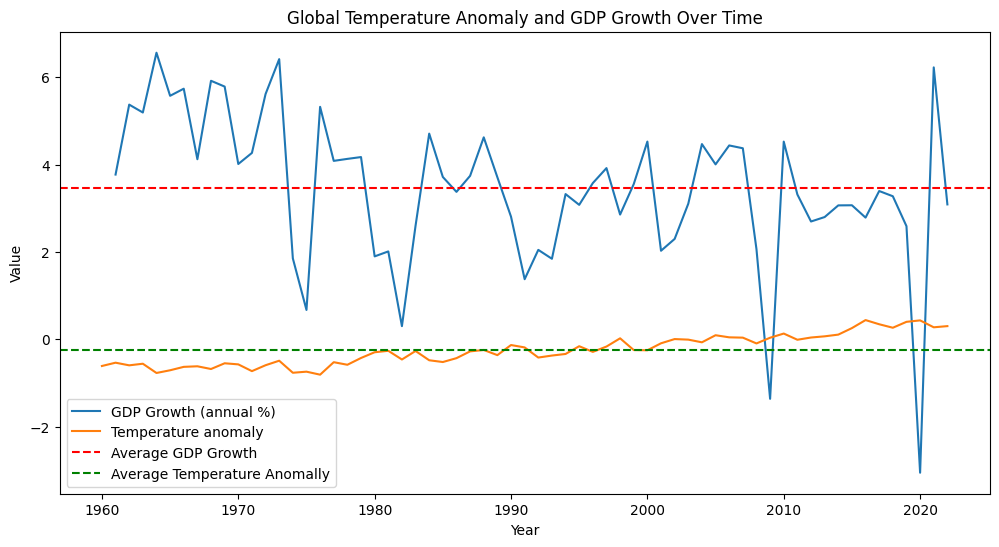

In [178]:
plt.figure(figsize=(12, 6))
plt.plot(merged["Year"],
         merged["GDP growth (annual %)"],
         label = "GDP Growth (annual %)")
plt.plot(merged["Year"],
         merged["Temperature anomaly"],
         label = "Temperature anomaly")
plt.axhline(y=avrg_gdp, color='r', 
            linestyle='--', 
            label='Average GDP Growth')
plt.axhline(y=avrg_temp, color='g', 
            linestyle='--', 
            label='Average Temperature Anomally')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Global Temperature Anomaly and GDP Growth Over Time')
plt.legend()
plt.show()

In [179]:
correlation = merged[["Temperature anomaly", "GDP growth (annual %)"]].corr().iloc[0,1]
correlation

-0.3783556769142508

Major Country
---

In [180]:
merged = pd.merge(annual_gdp[annual_gdp["Country Code"].isin(major_country)],
                  annual_temp[annual_temp["Country Code"].isin(major_country)],
                  on = ["Country Code", "Year"])
merged

,Country Name_x,Country Code,Year,GDP growth (annual %),Country Name_y,Temperature anomaly
0,China,CHN,1960,NaN,China,-0.759920
1,India,IND,1960,NaN,India,-0.247165
2,Japan,JPN,1960,NaN,Japan,-0.622169
3,"Korea, Rep.",KOR,1960,NaN,South Korea,-0.276928
4,Russian Federation,RUS,1960,NaN,Russia,-1.872268
...,...,...,...,...,...,...
373,India,IND,2022,7.239693,India,0.271049
374,Japan,JPN,2022,0.954737,Japan,0.687847
375,"Korea, Rep.",KOR,2022,2.612672,South Korea,0.383670
376,Russian Federation,RUS,2022,-2.069712,Russia,0.987122


In [181]:
merged = merged.dropna()
merged

,Country Name_x,Country Code,Year,GDP growth (annual %),Country Name_y,Temperature anomaly
6,China,CHN,1961,-27.270000,China,-0.707900
7,India,IND,1961,3.722743,India,-0.920877
8,Japan,JPN,1961,12.043536,Japan,-0.167055
9,"Korea, Rep.",KOR,1961,6.935993,South Korea,-0.046555
11,United States,USA,1961,2.300000,United States,-1.166476
...,...,...,...,...,...,...
373,India,IND,2022,7.239693,India,0.271049
374,Japan,JPN,2022,0.954737,Japan,0.687847
375,"Korea, Rep.",KOR,2022,2.612672,South Korea,0.383670
376,Russian Federation,RUS,2022,-2.069712,Russia,0.987122


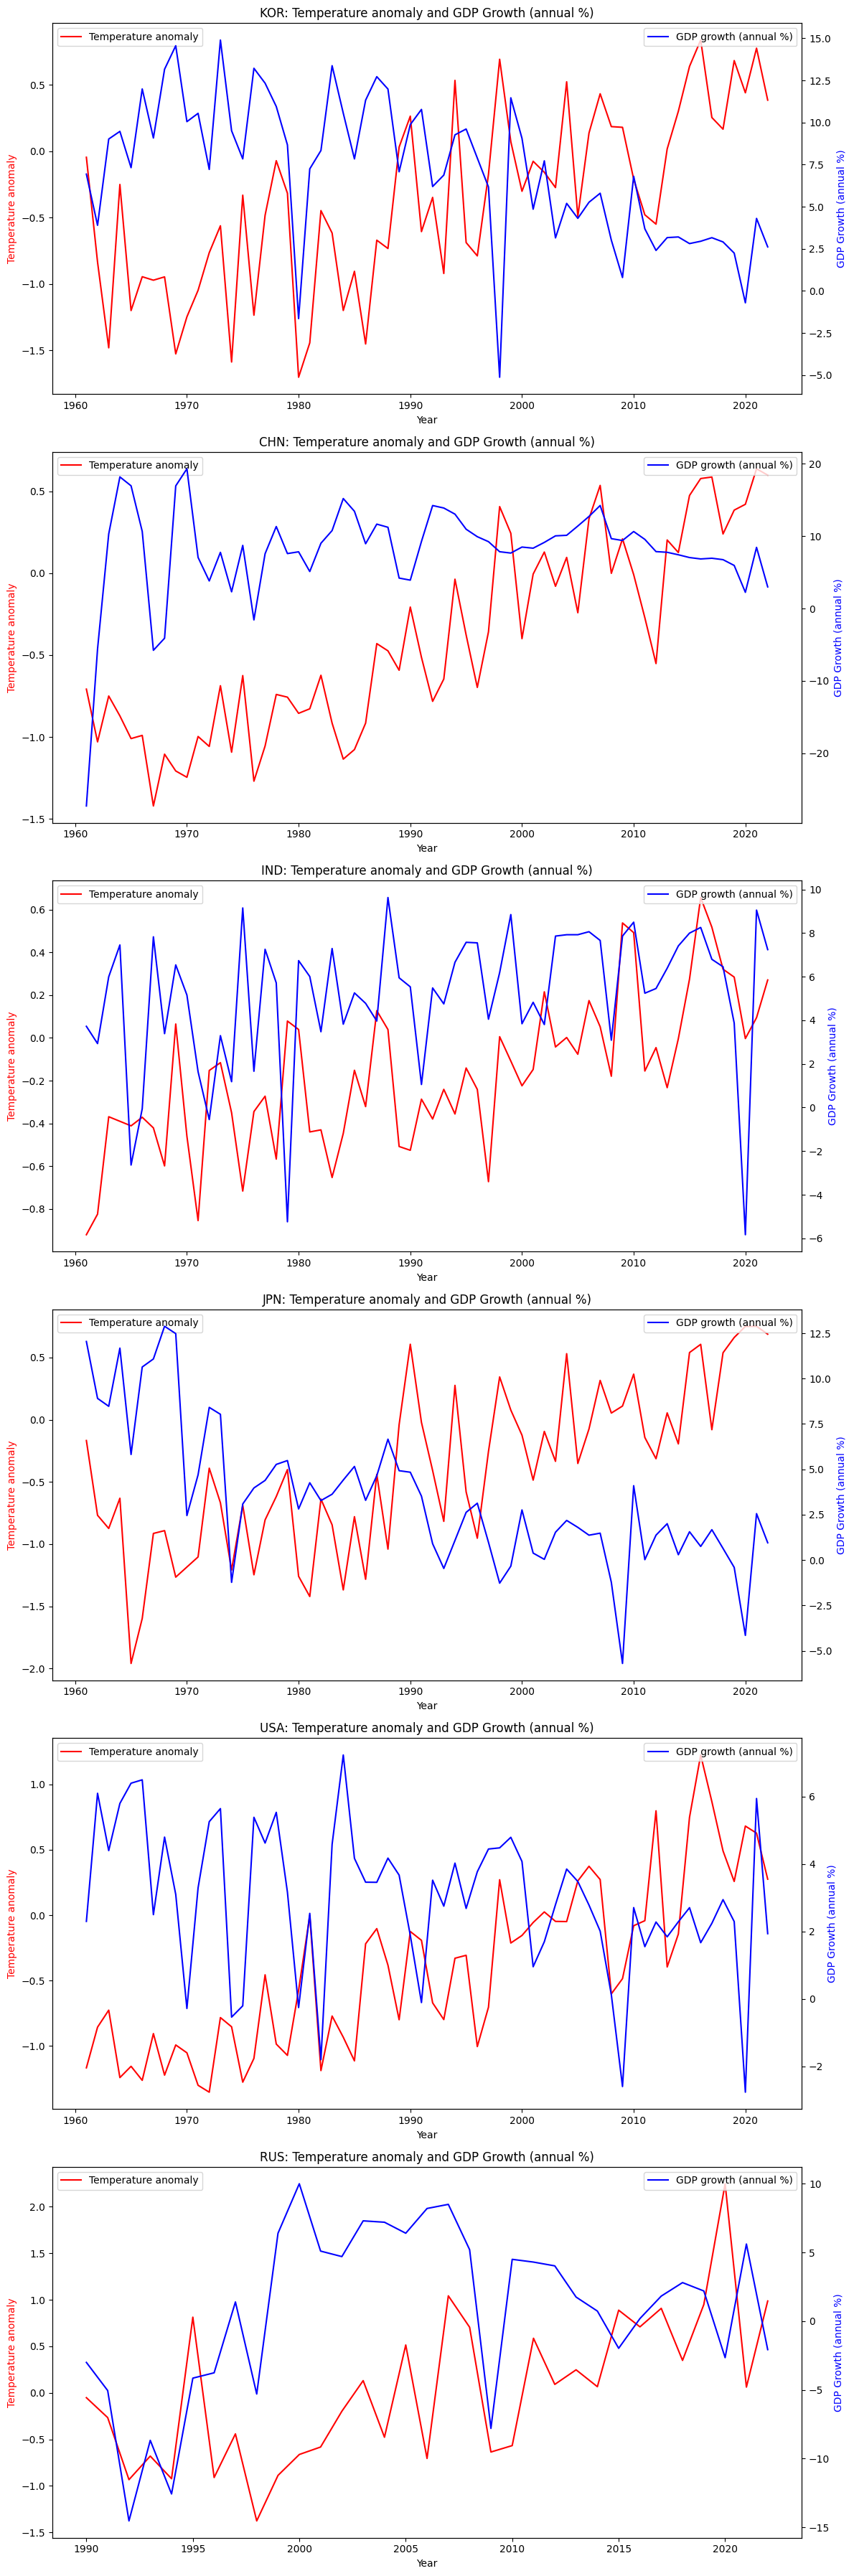

In [182]:
correlations = {}

fig, axes = plt.subplots(nrows= len(major_country),
                       ncols =1,
                       figsize= (12, 6*len(major_country)))

for i, code in enumerate(major_country) :
    df = merged[merged["Country Code"] == code]
    ax = axes[i] if len(major_country) > 1 else axes
    ax.plot(df['Year'], df['Temperature anomaly'], 
            label='Temperature anomaly', color='red')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature anomaly', color='red')
    ax2 = ax.twinx()
    ax2.plot(df['Year'], df['GDP growth (annual %)'], label='GDP growth (annual %)', color='blue')
    ax2.set_ylabel('GDP Growth (annual %)', color='blue')
    ax.set_title(f'{code}: Temperature anomaly and GDP Growth (annual %)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    cor = df[["Temperature anomaly", "GDP growth (annual %)"]].corr().iloc[0, 1]
    correlations[code] = cor
    

plt.tight_layout()
plt.show()

In [183]:
for code, correlation in correlations.items():
    print(f"{code}: {correlation}")

KOR: -0.5108263339912892
CHN: 0.05894212098524853
IND: 0.24072672731531253
JPN: -0.4843991419601622
USA: -0.24237010525403294
RUS: 0.19870971530754902


Question 2: GDP growth vs Temperature Anomaly vs Industry Value 
=== 

In [184]:
merged = pd.merge(world_industry, world_gdp, on = ["Country Name", "Year"])
merged = merged[["Country Name", "Year",
                 "Industry Value (annual %)", "GDP growth (annual %)"]]
merged = pd.merge(merged, world_temp, on = ["Country Name", "Year"])
merged


,Country Name,Year,Industry Value (annual %),GDP growth (annual %),Country Code,Temperature anomaly
0,World,1995,3.280462,3.078986,OWID_WRL,-0.159370
1,World,1996,3.605327,3.578191,OWID_WRL,-0.289326
2,World,1997,3.266895,3.921035,OWID_WRL,-0.167112
3,World,1998,1.929036,2.856762,OWID_WRL,0.021509
4,World,1999,3.374336,3.554733,OWID_WRL,-0.247356
5,World,2000,5.189862,4.529039,OWID_WRL,-0.252422
6,World,2001,0.176740,2.027498,OWID_WRL,-0.092412
7,World,2002,1.739339,2.298720,OWID_WRL,0.004264
8,World,2003,3.822468,3.105600,OWID_WRL,-0.008699
9,World,2004,5.456350,4.471494,OWID_WRL,-0.070053


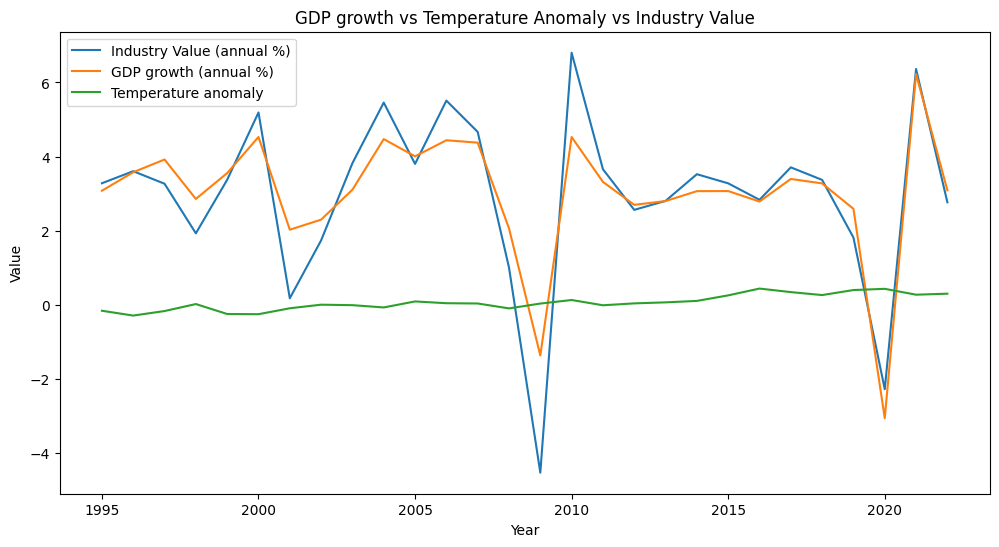

In [185]:
plt.figure(figsize= (12, 6))
plt.plot(merged["Year"],
         merged["Industry Value (annual %)"],
         label = "Industry Value (annual %)")
plt.plot(merged["Year"],
         merged["GDP growth (annual %)"],
         label = "GDP growth (annual %)")
plt.plot(merged["Year"],
         merged["Temperature anomaly"],
         label = "Temperature anomaly")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("GDP growth vs Temperature Anomaly vs Industry Value")
plt.legend()
plt.show()

In [186]:
correlation = merged[["GDP growth (annual %)", 
                      "Industry Value (annual %)",
                      "Temperature anomaly"]].corr()
correlation

,GDP growth (annual %),Industry Value (annual %),Temperature anomaly
GDP growth (annual %),1.000000,0.926431,-0.239205
Industry Value (annual %),0.926431,1.000000,-0.128639
Temperature anomaly,-0.239205,-0.128639,1.000000


Question 3: CO2 emission vs GDP Growth vs Temperature anomaly
===

In [187]:
merged = pd.merge(world_co2, world_gdp, on = ["Country Name", "Year"])
merged = merged[["Country Name", "Year",
                 "CO2 emission growth", "GDP growth (annual %)"]]
merged = pd.merge(merged, world_temp, on = ["Country Name", "Year"])
merged = merged.dropna()
merged

,Country Name,Year,CO2 emission growth,GDP growth (annual %),Country Code,Temperature anomaly
1,World,1961,0.297892,3.772924,OWID_WRL,-0.537026
2,World,1962,3.528357,5.375360,OWID_WRL,-0.597581
3,World,1963,5.329990,5.194927,OWID_WRL,-0.560586
4,World,1964,5.431223,6.564476,OWID_WRL,-0.772528
5,World,1965,4.490840,5.577451,OWID_WRL,-0.710605
...,...,...,...,...,...,...
58,World,2018,2.058244,3.276283,OWID_WRL,0.263880
59,World,2019,0.742948,2.590785,OWID_WRL,0.399228
60,World,2020,-5.486936,-3.057810,OWID_WRL,0.432162
61,World,2021,5.166876,6.228594,OWID_WRL,0.273689


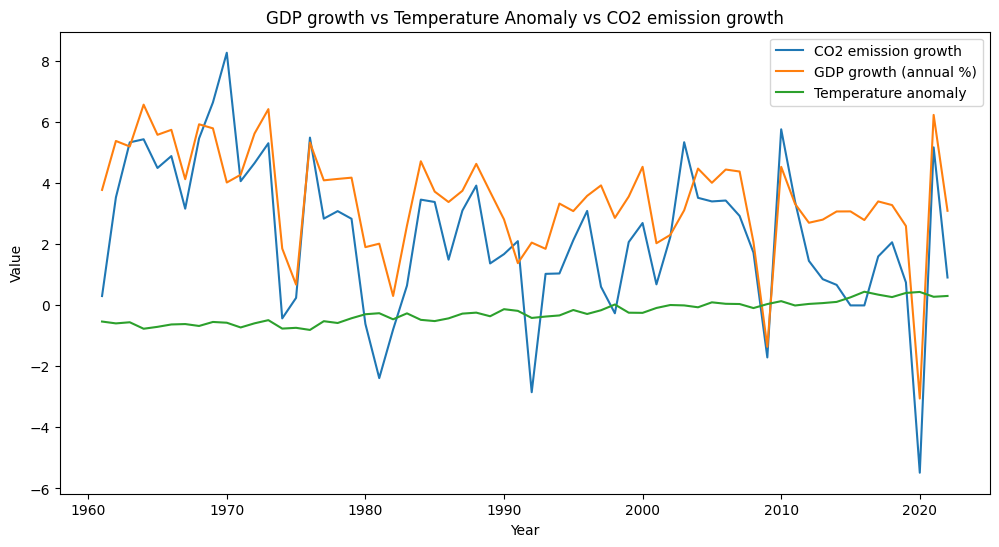

In [188]:
plt.figure(figsize= (12, 6))
plt.plot(merged["Year"],
         merged["CO2 emission growth"],
         label = "CO2 emission growth")
plt.plot(merged["Year"],
         merged["GDP growth (annual %)"],
         label = "GDP growth (annual %)")
plt.plot(merged["Year"],
         merged["Temperature anomaly"],
         label = "Temperature anomaly")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("GDP growth vs Temperature Anomaly vs CO2 emission growth")
plt.legend()
plt.show()

In [189]:
correlation = merged[["GDP growth (annual %)", 
                      "CO2 emission growth",
                      "Temperature anomaly"]].corr()
correlation

,GDP growth (annual %),CO2 emission growth,Temperature anomaly
GDP growth (annual %),1.000000,0.822225,-0.378356
CO2 emission growth,0.822225,1.000000,-0.371718
Temperature anomaly,-0.378356,-0.371718,1.000000


In [190]:
merged_world = merged

Plus Question
===

In [191]:
disaster = pd.read_csv("natural_disaster_events.csv")
disaster = disaster[(disaster["Year"] < 2023) & (disaster["Year"] >= 1960)]
disaster = disaster.rename(columns={"Entity": "Type"})
disaster = disaster[["Type", "Year", "Disasters"]]
disaster = disaster[disaster["Type"] == "All disasters excluding earthquakes"]
merged

,Country Name,Year,CO2 emission growth,GDP growth (annual %),Country Code,Temperature anomaly
1,World,1961,0.297892,3.772924,OWID_WRL,-0.537026
2,World,1962,3.528357,5.375360,OWID_WRL,-0.597581
3,World,1963,5.329990,5.194927,OWID_WRL,-0.560586
4,World,1964,5.431223,6.564476,OWID_WRL,-0.772528
5,World,1965,4.490840,5.577451,OWID_WRL,-0.710605
...,...,...,...,...,...,...
58,World,2018,2.058244,3.276283,OWID_WRL,0.263880
59,World,2019,0.742948,2.590785,OWID_WRL,0.399228
60,World,2020,-5.486936,-3.057810,OWID_WRL,0.432162
61,World,2021,5.166876,6.228594,OWID_WRL,0.273689


In [192]:
merged_world = pd.merge(merged_world, disaster, on = ["Year"])
merged_world

,Country Name,Year,CO2 emission growth,GDP growth (annual %),Country Code,Temperature anomaly,Type,Disasters
0,World,1961,0.297892,3.772924,OWID_WRL,-0.537026,All disasters excluding earthquakes,27
1,World,1962,3.528357,5.375360,OWID_WRL,-0.597581,All disasters excluding earthquakes,25
2,World,1963,5.329990,5.194927,OWID_WRL,-0.560586,All disasters excluding earthquakes,38
3,World,1964,5.431223,6.564476,OWID_WRL,-0.772528,All disasters excluding earthquakes,54
4,World,1965,4.490840,5.577451,OWID_WRL,-0.710605,All disasters excluding earthquakes,54
...,...,...,...,...,...,...,...,...
57,World,2018,2.058244,3.276283,OWID_WRL,0.263880,All disasters excluding earthquakes,303
58,World,2019,0.742948,2.590785,OWID_WRL,0.399228,All disasters excluding earthquakes,382
59,World,2020,-5.486936,-3.057810,OWID_WRL,0.432162,All disasters excluding earthquakes,391
60,World,2021,5.166876,6.228594,OWID_WRL,0.273689,All disasters excluding earthquakes,413


In [193]:
merged_world_include_industry = pd.merge(merged_world, 
                                         world_industry[["Country Name", "Year", "Industry Value (annual %)"]],
                                         on = ["Country Name", "Year"])
merged_world_include_industry

,Country Name,Year,CO2 emission growth,GDP growth (annual %),Country Code,Temperature anomaly,Type,Disasters,Industry Value (annual %)
0,World,1995,2.125978,3.078986,OWID_WRL,-0.159370,All disasters excluding earthquakes,228,3.280462
1,World,1996,3.084743,3.578191,OWID_WRL,-0.289326,All disasters excluding earthquakes,218,3.605327
2,World,1997,0.601196,3.921035,OWID_WRL,-0.167112,All disasters excluding earthquakes,240,3.266895
3,World,1998,-0.266469,2.856762,OWID_WRL,0.021509,All disasters excluding earthquakes,270,1.929036
4,World,1999,2.065480,3.554733,OWID_WRL,-0.247356,All disasters excluding earthquakes,310,3.374336
5,World,2000,2.689075,4.529039,OWID_WRL,-0.252422,All disasters excluding earthquakes,394,5.189862
6,World,2001,0.680923,2.027498,OWID_WRL,-0.092412,All disasters excluding earthquakes,370,0.176740
7,World,2002,2.233148,2.298720,OWID_WRL,0.004264,All disasters excluding earthquakes,401,1.739339
8,World,2003,5.335057,3.105600,OWID_WRL,-0.008699,All disasters excluding earthquakes,333,3.822468
9,World,2004,3.513896,4.471494,OWID_WRL,-0.070053,All disasters excluding earthquakes,326,5.456350


In [194]:
correlation = merged_world[["GDP growth (annual %)", 
                      "Disasters",
                      "Temperature anomaly"]].corr()
correlation

,GDP growth (annual %),Disasters,Temperature anomaly
GDP growth (annual %),1.000000,-0.346578,-0.378356
Disasters,-0.346578,1.000000,0.895695
Temperature anomaly,-0.378356,0.895695,1.000000


Question 4:
====

In [195]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [197]:
X = merged_world[["Temperature anomaly", "CO2 emission growth", "Disasters"]]
y = merged_world["GDP growth (annual %)"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.692
Model:                               OLS   Adj. R-squared:                  0.676
Method:                    Least Squares   F-statistic:                     43.40
Date:                   Tue, 04 Jun 2024   Prob (F-statistic):           7.71e-15
Time:                           16:50:54   Log-Likelihood:                -85.057
No. Observations:                     62   AIC:                             178.1
Df Residuals:                         58   BIC:                             186.6
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9762      0.672      4.430      0.000       1.631       4.321
Temperature anomaly     0.6010      0.859      0.700      0.487      -1.119       2.321
CO2 emission growth     0.5661      0.056     10.159      0.000       0.455       0.678
Disasters              -0.0030      0.002     -1.348      0.183      -0.007       0.001
==============================================================================
Omnibus:                       13.746   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.859
Skew:                          -1.058   Prob(JB):                     0.000593
Kurtosis:                       4.130   Cond. No.                     2.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
X = merged_world_include_industry[["Temperature anomaly", "CO2 emission growth", "Industry Value (annual %)"]]
y = merged_world_include_industry["GDP growth (annual %)"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.885
Model:                               OLS   Adj. R-squared:                  0.870
Method:                    Least Squares   F-statistic:                     61.33
Date:                   Tue, 04 Jun 2024   Prob (F-statistic):           2.12e-11
Time:                           16:51:31   Log-Likelihood:                -24.627
No. Observations:                     28   AIC:                             57.25
Df Residuals:                         24   BIC:                             62.58
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1242      0.205      5.483      0.000       0.701       1.547
Temperature anomaly          -0.6375      0.640     -0.996      0.329      -1.959       0.684
CO2 emission growth           0.1524      0.098      1.559      0.132      -0.049       0.354
Industry Value (annual %)     0.5629      0.089      6.330      0.000       0.379       0.746
==============================================================================
Omnibus:                       10.798   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.504
Skew:                          -1.159   Prob(JB):                      0.00864
Kurtosis:                       4.666   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""